In [1]:
import nltk
import spacy
import pandas as pd   #importing some necessary modules 

In [2]:
df = pd.read_csv("women reviews on clothes on Amazon.csv")     #opening the csv file to manipulate

In [3]:
reviews = df["Review Text"]            #assigning a variable to the review column
print(reviews)             

0       Absolutely wonderful - silky and sexy and comf...
1       Love this dress!  it's sooo pretty.  i happene...
2       I had such high hopes for this dress and reall...
3       I love, love, love this jumpsuit. it's fun, fl...
4       This shirt is very flattering to all due to th...
                              ...                        
6520    I saw this on line this morning and was hesita...
6521    I saw these sweaters in the store this fall an...
6522    I have purchased many different styles of pilc...
6523    Love this skirt... perfect length and cut! pil...
6524                Precious tee, washes well, runs large
Name: Review Text, Length: 6525, dtype: object


In [4]:
from nltk.corpus import stopwords           #importing stopwords for preprocessing 
import string

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\egzin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [8]:
stop_words = set(stopwords.words("english"))

In [9]:
stop_words = set(stopwords.words("english"))

In [10]:
   #Converts the text to lowercase, Removes all punctuation.
    #Processes the text with a spaCy NLP model to tokenize it.
   #Replaces tokens with their lemmatized form, excluding tokens that are stop words.
def preprocess_text(text):       
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans("", "", string.punctuation))
        doc = nlp(text)
        text = " ".join([token.lemma_ for token in doc if token.text not in stop_words])
        return text
    return ""
    

In [11]:
df["cleaned_review"] = df["Review Text"].apply(preprocess_text)     #make a new data frame and applying the privious function

In [12]:
print(df[["Review Text", "cleaned_review"]].head())   #just to see a glimps of the both data frames


                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                      cleaned_review  
0      absolutely wonderful   silky sexy comfortable  
1  love dress   sooo pretty   happen find store g...  
2  high hope dress really want work initially ord...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  shirt flattering due adjustable front tie perf...  


In [13]:

nltk.download("vader_lexicon")    #importing the sentiment analyzer 
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()   #making an instance of the analyzer class and naming it sia

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\egzin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
def get_sentiment(text):             #using polarity scores method of the sentiment analyzer 
    score = sia.polarity_scores(text)["compound"]l
    if score >= 0.05:
        return "positive"
    if score <= -0.05:
        return "negative"
    else:
        return "neutral"
df["sentiment"] = df["cleaned_review"].apply(get_sentiment)
print(df[["cleaned_review","sentiment"]][1498:1520])

                                         cleaned_review sentiment
1498  follow advice reviewer size however jacket sti...  positive
1499  stumble upon accident think turquoise color lo...  positive
1500  gorgeous color lovely silk skirt long photo 54...  positive
1501  absolutely beautiful  \r\n usually not leave r...  positive
1502      cute waist little big overall pretty good fit  positive
1503  beautiful dress color pleat problem bust area ...  negative
1504  try love chic lightweight warm cute leave cut ...  positive
1505  confess high hope dress buy stylish modern alt...  positive
1506  love shirt surprise review boxy unflattering g...  positive
1507  rare find great skirt   flattering unique desi...  positive
1508  really like top try wear bottom sleeve stretch...  negative
1509  skirt fit curve well adjustable waist helpful ...  positive
1510  know product description say oversized underst...  positive
1511  agree previous reviewer dress evanthe dress co...  positive
1512  buy 

C:\Users\egzin\AppData\Local\Temp\ipykernel_14704\863922905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm")


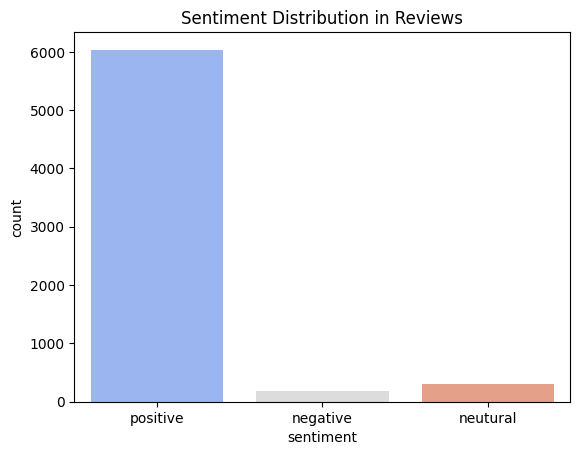

In [15]:
import seaborn as sns    #data visualization library based on matplotlib
import matplotlib.pyplot as plt    

# Countplot of sentiment distribution
sns.countplot(x=df["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution in Reviews")
plt.show()